***** Importing Dependencies *****

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cleaners import GSMArena_Dataset_Cleaner

import warnings
warnings.filterwarnings('ignore')

***** Loading Dataset *****

In [50]:
gsmarena_data = pd.read_csv('C:/Users/alber\Documents/My Personal Projects/Smartphone Project/Files/GSMArena.csv')

cleaner = GSMArena_Dataset_Cleaner(gsmarena_data) # Create a cleaner object

cleaned_gsm_arena_data = cleaner.clean() # Clean the data

In [51]:
cleaned_gsm_arena_data.head()

,Brand,Model,Highest_Network_Technology,Announced,Released,Status,Length,Width,Thickness,Weight,...,Colors,Charging_Speed,Wireless_Charging,Reverse_Charging,Loudspeaker_Voice,Loudspeaker_Noise,Loudspeaker_Ring,Battery_Life,IP_Rating,Price
0,ZTE,nubia X 5G,5G,Not Announced Yet,Not Released Yet,Cancelled,Not Measured,Not Measured,Not Measured,Not Measured,...,5,18,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
1,ZTE,Blade V20,LTE,Not Announced Yet,Not Released Yet,Cancelled,Not Measured,Not Measured,Not Measured,Not Measured,...,2,18,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
2,ZTE,Coral200 Sollar,GSM,2007-05,2007-01,Discontinued,106.0,45.6,18.1,85.0,...,1,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
3,ZTE,F100,UMTS,2009-01,2009-01,Discontinued,105.0,46.0,12.6,90.0,...,3,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
4,ZTE,F101,UMTS,2009-01,2009-01,Discontinued,105.0,46.0,12.6,90.0,...,3,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified


In [52]:
cleaned_gsm_arena_data.shape


(11936, 68)

In [53]:
null_counts = cleaned_gsm_arena_data.isnull().sum()

# Display the number of null values for each column
print(null_counts)


Brand                         0
Model                         0
Highest_Network_Technology    0
Announced                     0
Released                      0
                             ..
Loudspeaker_Noise             0
Loudspeaker_Ring              0
Battery_Life                  0
IP_Rating                     0
Price                         0
Length: 68, dtype: int64


To analyze the dataset, we first need to understand its structure. After performing data cleaning, our dataset consists of 11,936 rows and 68 columns.<br>
There are no null values present in the dataset, indicating a high data completeness brought about by the rigorous cleaning process.

***** Brands *****

We start our analysis by looking at the distribution of the brands represented in the dataset.

In [54]:
cleaned_gsm_arena_data['Brand'].unique().size

119

* There are 119 brands represented in the dataset

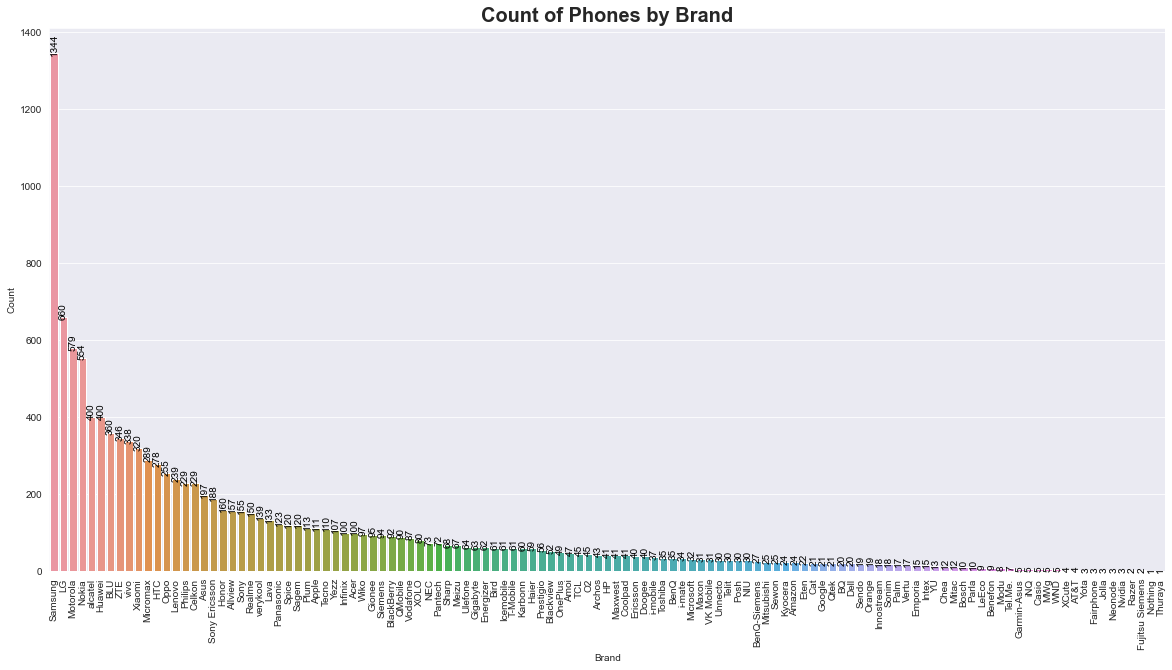

In [55]:
sns.set_style('darkgrid')

# Count the number of occurrences for each value in the 'Brand' column
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values)

# Add actual values on top of each bar
for i, v in enumerate(brand_counts.values):
    plt.text(i, v, str(v), fontsize=10, color='black', ha='center', rotation=90)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of Phones by Brand', fontsize=20, weight='bold')

# Show the plot
plt.show()


In [56]:
# Sort the brands based on the number of devices released in descending order
sorted_brands = brand_counts.sort_values(ascending=False)

# Calculate the cumulative percentage of devices released for each brand
cumulative_percentage = sorted_brands.cumsum() / sorted_brands.sum()

# Find the number of brands whose cumulative percentage reaches or exceeds 80%
brands_80_percent = cumulative_percentage[cumulative_percentage >= 0.8]

num_brands_80_percent = len(brands_80_percent)

print("Number of brands accounting for 80% of devices released:", num_brands_80_percent)


Number of brands accounting for 80% of devices released: 82


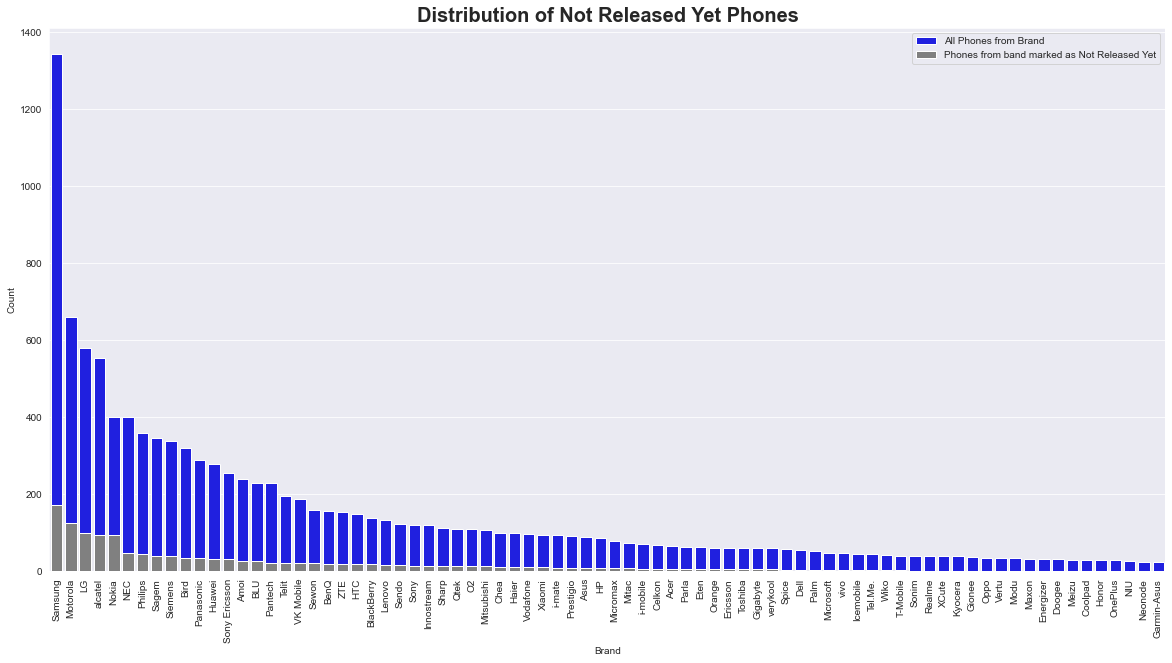

In [80]:
sns.set_style('darkgrid')

# Count the number of occurrences for each value in the 'Brand' column
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()
not_released_counts = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Released']=='Not Released Yet']['Brand'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values, color='blue', label='All Phones from Brand')
sns.barplot(x=not_released_counts.index, y=not_released_counts.values, color='gray', label='Phones from band marked as Not Released Yet')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Not Released Yet Phones', fontsize=20, weight='bold')
plt.legend()

# Show the plot
plt.show()


* A plot of the distribution of the number of devices released by each brand shows that Samsung has released the most devices, <br>
followed by LG, Motorola, Nokia, Alcatel and Huawei respectively. 
* The distribution is somewhat skewed with 82 brands releasing 80% of the devices
* The number of devices announced but not released yet appears to follow the same pattern as the overrall distribution of devices

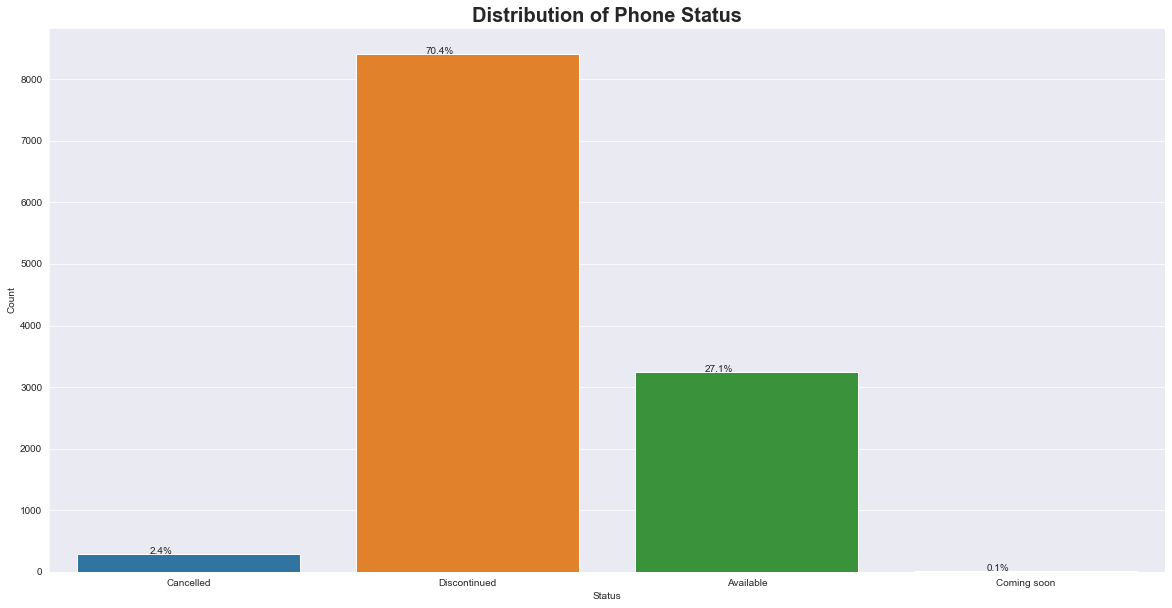

In [57]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Status', data=cleaned_gsm_arena_data)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Phone Status', fontsize=20, weight='bold')

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Status']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

* As at the time of the creation of the dataset on 04 January 2023, 27% of all devices ever released were still available, <br>
70% had been discontinued, 2.4% had been cancelled after announcement and 0.1% were announced and coming soon.

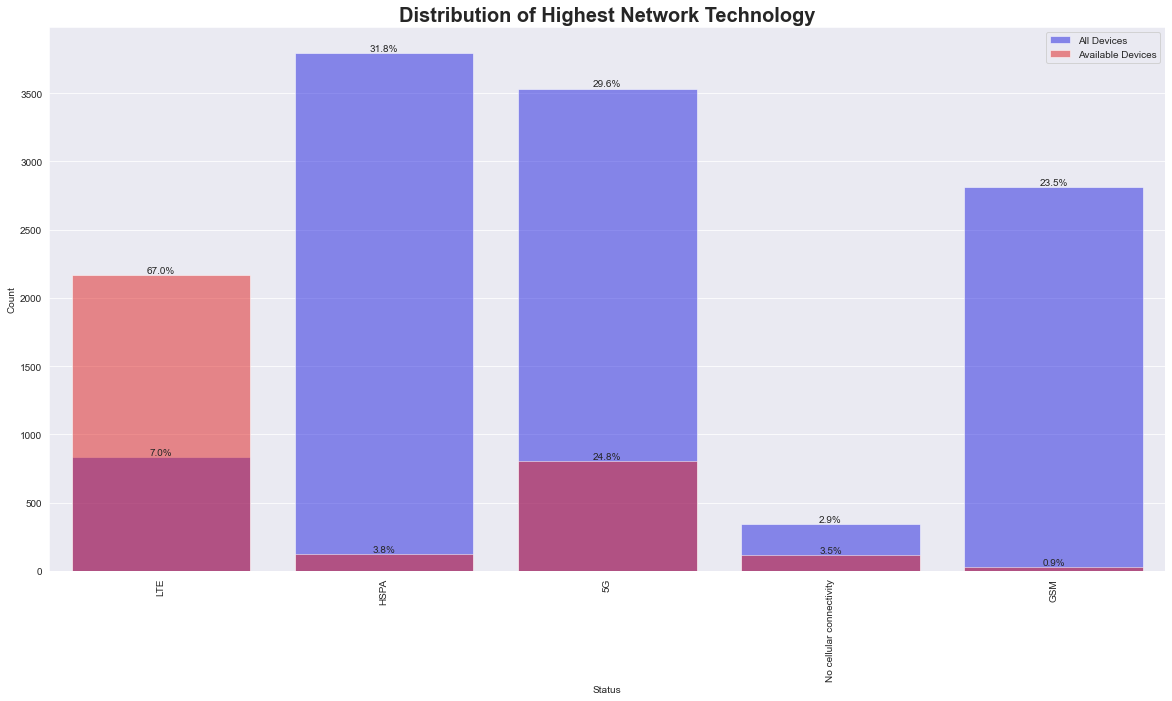

In [58]:
available_devices = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Status'] == 'Available']

# Calculate the total count of all devices and available devices
total_count = len(cleaned_gsm_arena_data['Highest_Network_Technology'])
available_count = len(available_devices['Highest_Network_Technology'])

# Create a countplot using seaborn for all devices
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Highest_Network_Technology', data=cleaned_gsm_arena_data, color='blue', alpha=0.5, label='All Devices')

# Iterate over the bars and add percentage annotations for all devices
for p in ax.patches:
    category = p.get_x()
    count = p.get_height()
    percentage = f'{100 * count / total_count:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{percentage}', (x, y), ha='center', va='bottom')

# Create a countplot using seaborn for available devices (superimposed)
sns.countplot(x='Highest_Network_Technology', data=available_devices, color='red', alpha=0.5, label='Available Devices')

# Iterate over the bars and add percentage annotations for available devices
for p in ax.patches[len(ax.patches) // 2:]:
    count = p.get_height()
    percentage = f'{100 * count / available_count:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{percentage}', (x, y), ha='center', va='bottom')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Highest Network Technology', fontsize=20, weight='bold')

# Add legend
plt.legend()

# Show the plot
plt.show()





* 67% of devices currently available on the market are LTE capable
* almost 25% of devices currently availabel on the market are 5G capable
* These 2 technologies have seen rapid adoption in recent years

In [60]:
top_brand_data = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Released']!='Not Released Yet']
top_brand_data['Release_Year'] = top_brand_data['Released'].apply(lambda x: x.year)
# group data by 'Brand' and year, and count the number of phones released
phone_counts = top_brand_data.groupby(['Brand', 'Release_Year']).size()
print(phone_counts)

Brand  Release_Year
AT&T   2006             1
       2007             2
       2008             1
Acer   2009            10
       2010             8
                       ..
vivo   2018            31
       2019            47
       2020            49
       2021            76
       2022            83
Length: 907, dtype: int64


In [61]:
import plotly.express as px

# Get the phone counts by brand and release year
phone_counts = top_brand_data.groupby(['Brand', 'Release_Year']).size().reset_index(name='count')

# Create the line plot
fig = px.line(phone_counts, x='Release_Year', y='count', color='Brand')

# Set the x-axis label
fig.update_xaxes(title_text='Release Year')

# Set the y-axis label
fig.update_yaxes(title_text='Count')

# Set the plot title
fig.update_layout(title='Number of Phones Released by Brand each Year between 1994 and 2022')



# Set the maximum value of the x-axis to 2022
fig.update_layout(xaxis=dict(range=[top_brand_data['Release_Year'].min(), 2022]))

# Remove the legend
fig.update_layout(showlegend=False, height=600, width=1200)

# Show the plot
fig.show()


In [62]:
import ipywidgets as widgets
from ipywidgets import interact

# Get the phone counts by brand and release year
phone_counts = top_brand_data.groupby(['Brand', 'Release_Year']).size().reset_index(name='count')

# Create a list of all the available brands
brands = phone_counts['Brand'].unique().tolist()

# Define a function to update the plot based on the selected brand
def update_plot(brands):
    # Filter the phone counts by the selected brands
    brand_counts = phone_counts[phone_counts['Brand'].isin(brands)]
    
    # Set the size of the figure
    plt.figure(figsize=(20,10))

    # Create the line plot
    sns.set_style('whitegrid')
    g = sns.lineplot(x='Release_Year', y='count', hue='Brand', data=brand_counts)

    # Set the x-axis label and ticks
    g.set(xlabel='Release Year')
    g.set(ylabel='Count')
    g.set(title=f'Number of Phones Released by {", ".join(brands)} each Year')
    g.set_xticks(range(2010, 2023))

    # Show the plot
    plt.show()

# Create the interactive widget
interact(update_plot, brands=widgets.SelectMultiple(options=brands, value=[brands[0]], description='Brand:'));


interactive(children=(SelectMultiple(description='Brand:', index=(0,), options=('AT&T', 'Acer', 'Allview', 'Am…

* The first graph shows the number of devices each of the brands released over the timeframe covered by the dataset
* The second graph allows one to choose the Brands they want to see, since the first graph is somewhat overwhelming

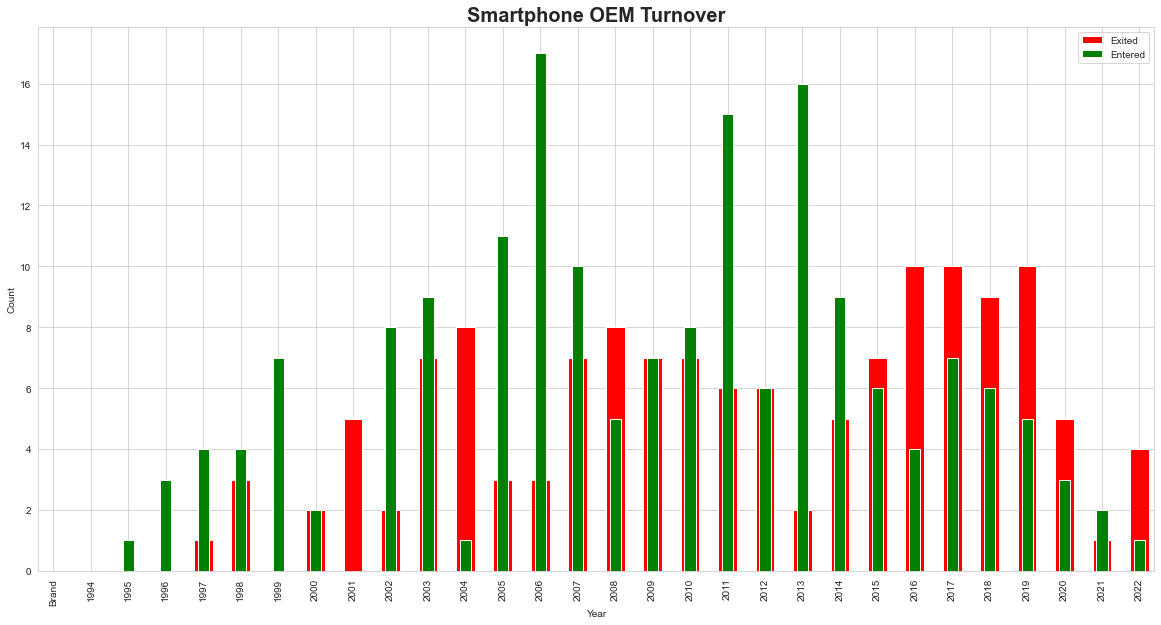

In [63]:
# Create a pivot table to count the number of models released by each OEM in each year
chipset_per_year = pd.pivot_table(top_brand_data, values='Model', index='Brand', columns='Release_Year', aggfunc='count', fill_value=0)

# Reindex the pivot table to include all years from 1995 to 2022
all_years = pd.Index(range(1994, 2023), name='Year')
chipset_per_year = chipset_per_year.reindex(columns=all_years, fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
chipset_per_year = chipset_per_year.reset_index()

# Create a new dataframe to record the changes
changes_df = chipset_per_year.copy()

# Iterate over each row starting from the second row
for i in range(0, len(chipset_per_year)):
    # Iterate over each year column starting from the second column
    for j in range(2, len(chipset_per_year.columns)):
        if j == 0:
            continue

        prev_value = int(chipset_per_year.iloc[i, j-1])
        curr_value = int(chipset_per_year.iloc[i, j])

        # Check the conditions and label the changes accordingly
        if prev_value == 0 and curr_value > 0:
            changes_df.iloc[i, j] = "entered"
        elif prev_value == 0 and curr_value == 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value > 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value == 0:
            changes_df.iloc[i, j] = "exited"

# Compute the counts of entered and exited OEMs
entered_counts = changes_df[changes_df == "entered"].count()
exited_counts = changes_df[changes_df == "exited"].count()

# Create a bar plot
fig, ax = plt.subplots(figsize=(20, 10))
exited_counts.plot(kind="bar", color="red", label="Exited", ax=ax)
entered_counts.plot(kind="bar", color="green", label="Entered", ax=ax, width=0.3)

# Set the plot title and axis labels
plt.title("Smartphone OEM Turnover", fontsize=20, weight='bold')
plt.xlabel("Year")
plt.ylabel("Count")

# Add a legend
plt.legend()

# Display the plot
plt.show()

* The graph of Smartphone OEM Turnover is particularly interesting
* There was a huge growth in the market from 1995 to 2000, and then in 2001 several OEMs exited the market.
* The exits in 2001 and 2008-2010 could have been brought about by periods of economic depression
* 2006, 2011 and 2011 had the largets number of market entrants.
* In recent years, there have consistently been more OEMs exiting the market than entering it.
* This is consistent with sales data that shows that a few OEMs like Apple and Samsung account for most of the sales in the smartphone market
* This may be pushing out smaller OEMs

***** Build *****

In [64]:
#find the thinnest devices
thinnest_devices = cleaned_gsm_arena_data.loc[cleaned_gsm_arena_data['Thickness'] != 'Not Measured', ['Brand', 'Model', 'Released', 'Weight', 'Thickness']]
thinnest_devices = thinnest_devices.sort_values('Thickness').head(10)
print(thinnest_devices)


          Brand                Model Released Weight Thickness
11080    Archos           50b Cobalt  2017-01  160.0       0.0
6943   Micromax  Canvas Play 4G Q469  2015-11  100.0       0.0
11081    Archos           55b Cobalt  2017-01  188.0       0.0
7945     Lenovo       Yoga Tab 3 Pro  2015-12  666.8       4.7
5079       Oppo                   R5  2014-12  155.0       4.9
5092       Oppo                  R5s  2015-08  155.0       4.9
889        Wiko      Highway Pure 4G  2015-04   98.0       5.1
10364       BLU         Vivo Air LTE  2015-09   98.0       5.1
4356    QMobile              Noir Z9  2015-07   97.0       5.1
10341       BLU             Vivo Air  2015-01   97.0       5.1


In [65]:
#find the thickest devices
thickest_devices = cleaned_gsm_arena_data.loc[cleaned_gsm_arena_data['Thickness'] != 'Not Measured', ['Brand', 'Model', 'Released', 'Weight', 'Thickness']]
thickest_devices = thickest_devices.sort_values('Thickness', ascending=False).head(10)
print(thickest_devices)

          Brand              Model          Released        Weight Thickness
4022      Sagem            MY 3078           2002-01          85.0      75.0
2755    Samsung               Z110  Not Released Yet         120.0      50.0
4061      Sagem            MY V-76           2005-07         104.0      47.0
4060      Sagem            MY V-56  Not Released Yet          97.0      46.0
4062      Sagem            MY V-85  Not Released Yet         120.0      46.0
10750      Bird               S698  Not Released Yet          73.0      44.0
5419      Nokia  9000 Communicator           1998-01         397.0      38.0
9702   Ericsson             GH 218           1994-01  Not Measured      36.0
2288       Sony         CM-DX 1000           1997-01         235.0      32.0
9725   Ericsson          R250s PRO           2000-01         330.0      32.0


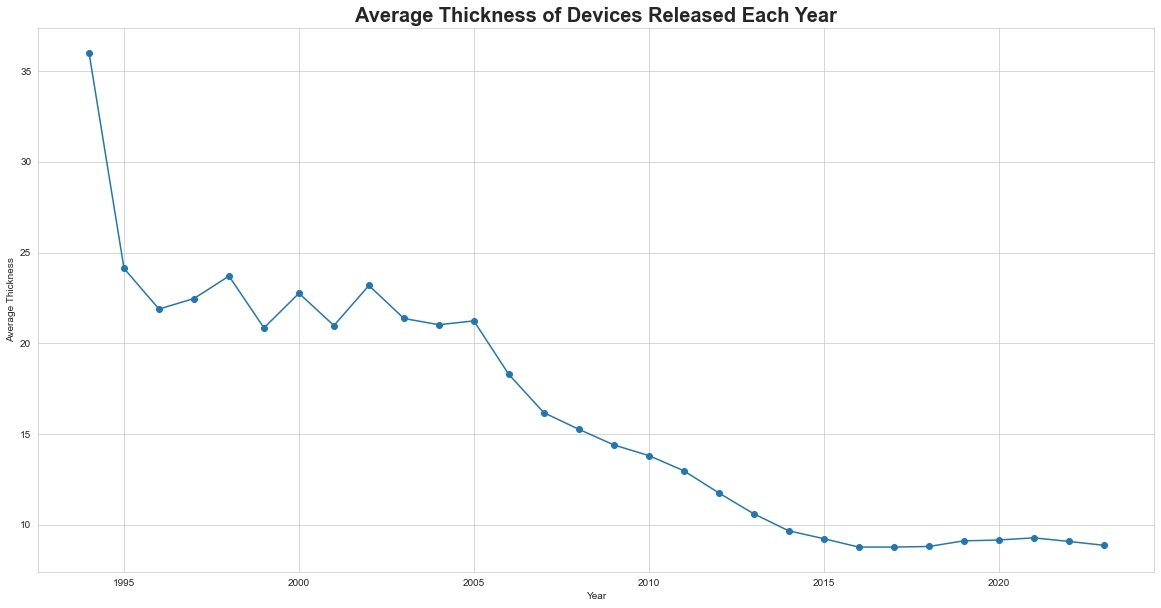

In [66]:
# Filter out devices with measured thickness
measured_screen_to_body_ratio = top_brand_data[cleaned_gsm_arena_data['Thickness'] != 'Not Measured']

# Convert 'Thickness' column to numeric values
measured_screen_to_body_ratio['Thickness'] = pd.to_numeric(measured_screen_to_body_ratio['Thickness'])

# Group the data by 'Release_Year' and calculate the average thickness for each year
average_thickness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Thickness'].mean()

# Plot the average thickness over the years
plt.figure(figsize=(20, 10))
plt.plot(average_thickness_by_year.index, average_thickness_by_year.values, marker='o')

# Set the plot title and axis labels
plt.title('Average Thickness of Devices Released Each Year', fontsize=20, weight='bold')
plt.xlabel('Year')
plt.ylabel('Average Thickness')

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()


In [67]:
# Find the lightest devices
lightest_devices = cleaned_gsm_arena_data.loc[cleaned_gsm_arena_data['Weight'] != 'Not Measured', ['Brand', 'Model', 'Released', 'Thickness', 'Weight']]
lightest_devices = lightest_devices.sort_values('Weight').head(10)
print(lightest_devices)


         Brand                          Model Released     Thickness Weight
8920    Huawei                 Watch Fit mini  2021-09          11.0   20.0
9367     Honor                       Watch ES  2020-09  Not Measured   21.0
8879    Huawei                      Watch Fit  2020-09          10.7   21.0
3841   Samsung            Galaxy Watch Active  2019-04          10.5   25.0
8901    Huawei              Watch Fit Elegant  2021-03          10.7   27.0
6608  Motorola                 Moto Watch 100  2021-12          11.9   29.0
296        ZTE                Red Magic Watch  2021-03          12.4   30.0
297        ZTE                       Watch GT  2021-03          12.4   30.0
3848   Samsung  Galaxy Watch Active2 Aluminum  2019-09          10.9   30.0
821     Xiaomi                     Poco Watch  2022-04          10.0   31.0


In [68]:
# Find the heaviest devices
heaviest_devices = cleaned_gsm_arena_data.loc[cleaned_gsm_arena_data['Weight'] != 'Not Measured', ['Brand', 'Model', 'Released', 'Thickness', 'Weight']]
heaviest_devices = heaviest_devices.sort_values('Weight', ascending=False).head(10)
print(heaviest_devices)

           Brand               Model          Released     Thickness  Weight
11430    Allview           Viva Home           2019-07          19.5  2018.3
9270          HP            Slate 17           2014-09          15.8  2005.0
1709     Toshiba     Excite 13 AT335           2012-07           9.8   998.0
4940   Panasonic      Toughpad FZ-A1  Not Released Yet          17.8   952.5
4939   Panasonic      Toughpad JT-B1           2012-01  Not Measured   952.5
7905      Lenovo   Yoga Tablet 2 Pro           2014-10          12.6   950.0
9268          HP  Pro Slate 10 EE G1           2015-01          14.4   855.0
9269          HP        Pro Slate 12           2015-01           8.0   850.0
8034      Lenovo         Yoga Tab 13           2021-05  Not Measured   830.0
8975         HTC               Shift           2008-02          25.0   800.0


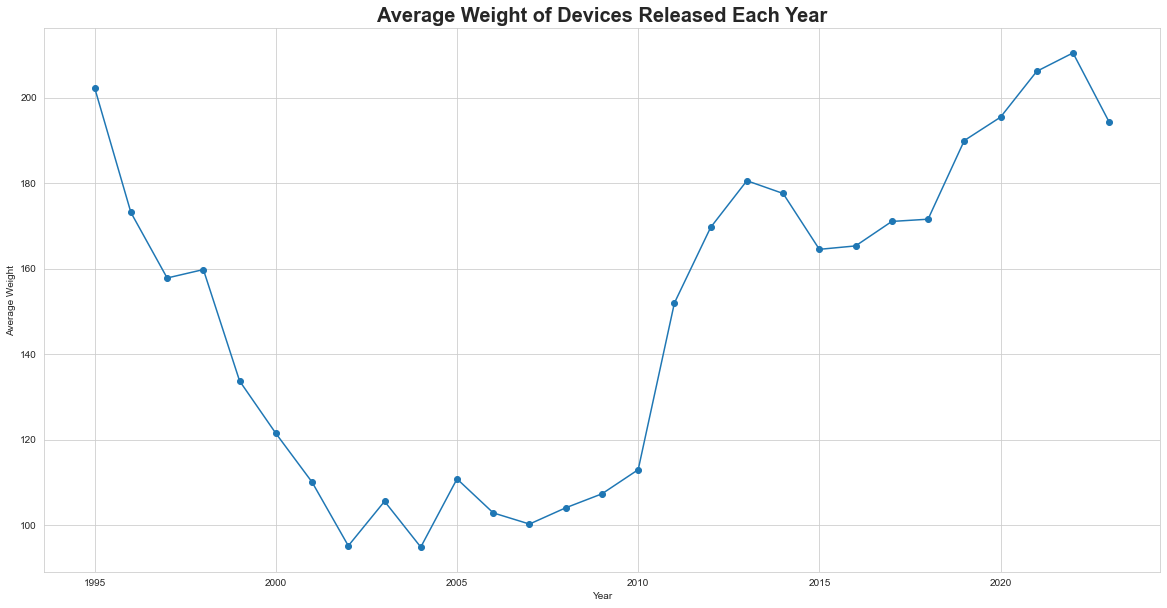

In [69]:
# Filter out devices with measured thickness
measured_screen_to_body_ratio = top_brand_data[cleaned_gsm_arena_data['Weight'] != 'Not Measured']

# Convert 'Thickness' column to numeric values
measured_screen_to_body_ratio['Weight'] = pd.to_numeric(measured_screen_to_body_ratio['Weight'])

# Group the data by 'Release_Year' and calculate the average thickness for each year
average_thickness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Weight'].mean()

# Plot the average thickness over the years
plt.figure(figsize=(20, 10))
plt.plot(average_thickness_by_year.index, average_thickness_by_year.values, marker='o')

# Set the plot title and axis labels
plt.title('Average Weight of Devices Released Each Year', fontsize=20, weight='bold')
plt.xlabel('Year')
plt.ylabel('Average Weight')

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

***** Display *****

In [70]:
cleaned_gsm_arena_data[['Brand', 'Display_Type',
       'Display_Brightness', 'Display_HDR_Capability', 'Display_Size_(inches)',
       'Screen_To_Body_Ratio_(%)', 'Display_Aspect_Ratio', 'Pixel_Density',
       'Display_Protection']]

,Brand,Display_Type,Display_Brightness,Display_HDR_Capability,Display_Size_(inches),Screen_To_Body_Ratio_(%),Display_Aspect_Ratio,Pixel_Density,Display_Protection
0,ZTE,LCD,Not Specified,No HDR,6.26,Not Measured,19:9,403,Corning Gorilla Glass 3
1,ZTE,LCD,Not Specified,No HDR,6.1,Not Measured,19.5:9,282,no special protection
2,ZTE,CSTN,Not Specified,No HDR,Not Measured,Not Measured,1:1,Not Measured,no special protection
3,ZTE,TFT,Not Specified,No HDR,2.0,26.1,Not Measured,141,no special protection
4,ZTE,TFT,Not Specified,No HDR,2.0,26.1,Not Measured,141,no special protection
...,...,...,...,...,...,...,...,...,...
11931,Acer,LCD,Not Specified,No HDR,10.1,68.4,16:10,224,no special protection
11932,Acer,LCD,Not Specified,No HDR,5.0,65.3,16:9,294,no special protection
11933,Acer,LCD,Not Specified,No HDR,5.5,71.7,16:9,401,no special protection
11934,Acer,LCD,Not Specified,No HDR,7.0,69.8,16:9,210,no special protection


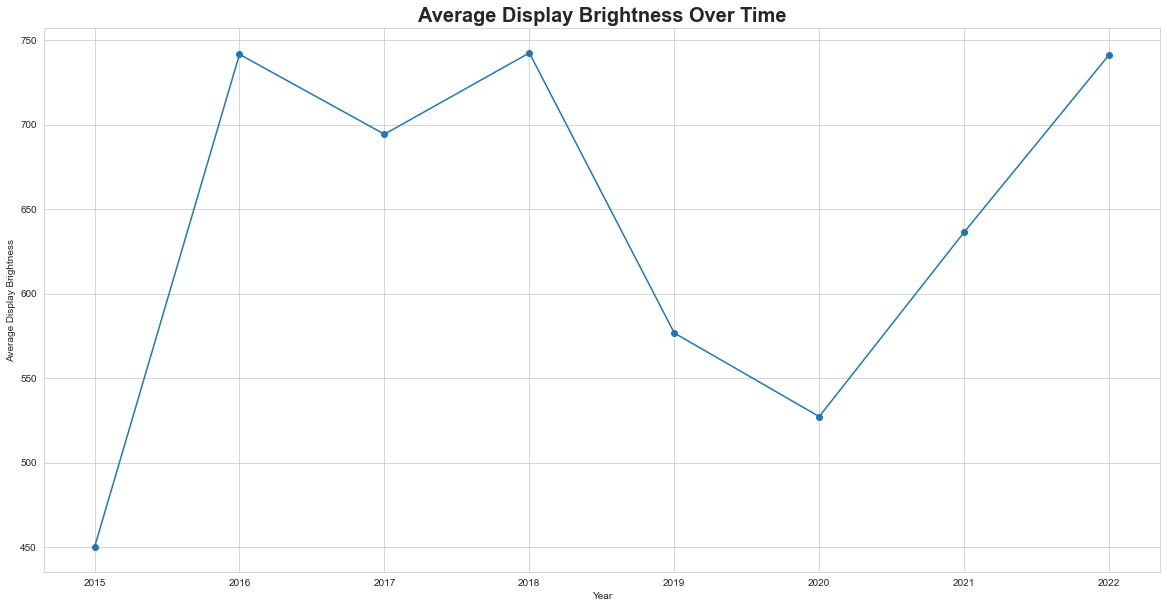

In [71]:
# Exclude rows with "Not Specified" display brightness
measured_screen_to_body_ratio = top_brand_data[top_brand_data['Display_Brightness'] != 'Not Specified']

# Convert display brightness to numeric values
measured_screen_to_body_ratio['Display_Brightness'] = pd.to_numeric(measured_screen_to_body_ratio['Display_Brightness'])

# Exclude the year 2023
measured_screen_to_body_ratio = measured_screen_to_body_ratio[measured_screen_to_body_ratio['Release_Year'] <= 2022]

# Group the data by year and calculate the average display brightness
avg_brightness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Display_Brightness'].mean()

# Plotting the line graph
plt.figure(figsize=(20, 10))
plt.plot(avg_brightness_by_year.index, avg_brightness_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Display Brightness')
plt.title('Average Display Brightness Over Time', fontsize=20, weight='bold')
plt.grid(True)
plt.show()


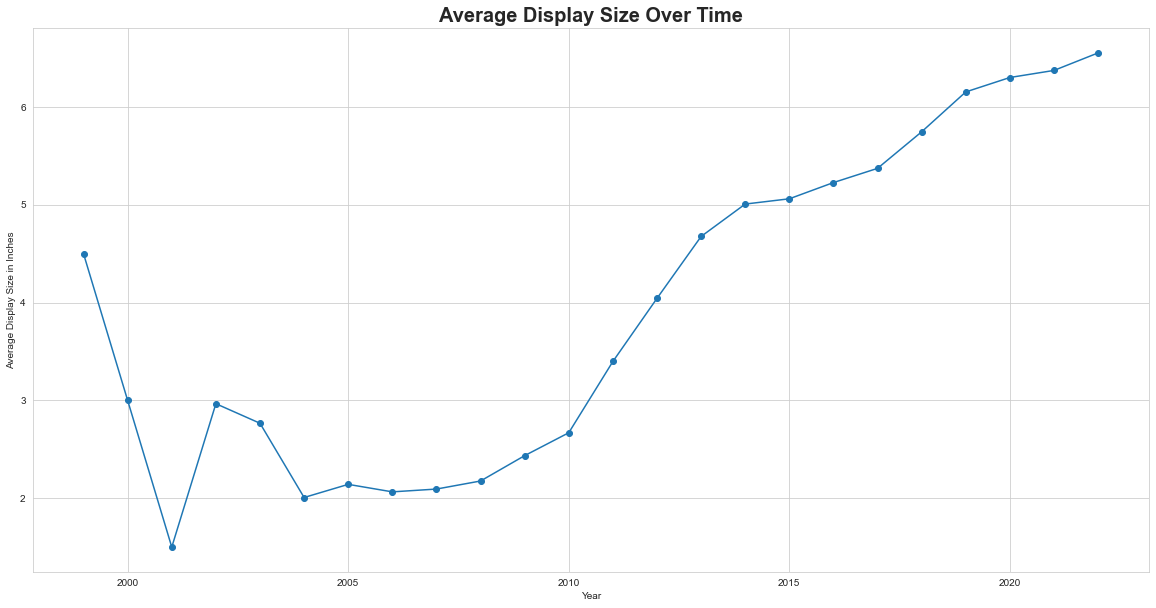

In [72]:
# Exclude rows with "Not Measured" display size
measured_screen_to_body_ratio = top_brand_data[top_brand_data['Display_Size_(inches)'] != 'Not Measured']

# Convert display size to numeric values
measured_screen_to_body_ratio['Display_Size_(inches)'] = pd.to_numeric(measured_screen_to_body_ratio['Display_Size_(inches)'])

# Exclude the year 2023
measured_screen_to_body_ratio = measured_screen_to_body_ratio[measured_screen_to_body_ratio['Release_Year'] <= 2022]

# Group the data by year and calculate the average display size
avg_brightness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Display_Size_(inches)'].mean()

# Plotting the line graph
plt.figure(figsize=(20, 10))
plt.plot(avg_brightness_by_year.index, avg_brightness_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Display Size in Inches')
plt.title('Average Display Size Over Time', fontsize=20, weight='bold')
plt.grid(True)
plt.show()

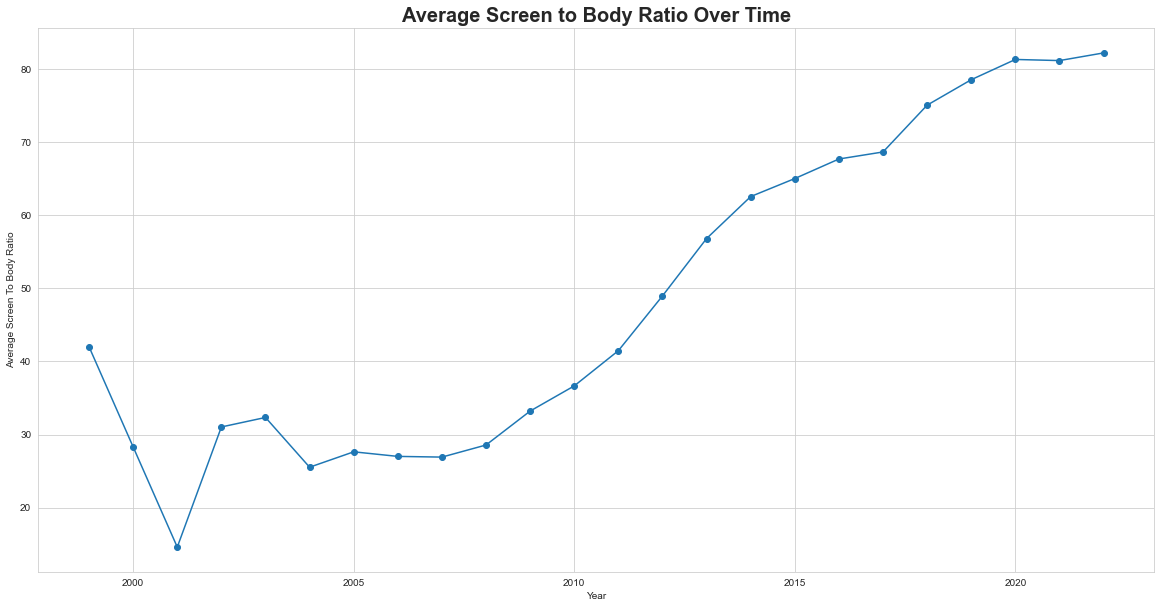

In [73]:
# Exclude rows with "Not Specified" display brightness
measured_screen_to_body_ratio = top_brand_data[top_brand_data['Screen_To_Body_Ratio_(%)'] != 'Not Measured']

# Convert display brightness to numeric values
measured_screen_to_body_ratio['Screen_To_Body_Ratio_(%)'] = pd.to_numeric(measured_screen_to_body_ratio['Screen_To_Body_Ratio_(%)'])

# Exclude the year 2023
measured_screen_to_body_ratio = measured_screen_to_body_ratio[measured_screen_to_body_ratio['Release_Year'] <= 2022]

# Group the data by year and calculate the average display brightness
avg_brightness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Screen_To_Body_Ratio_(%)'].mean()

# Plotting the line graph
plt.figure(figsize=(20, 10))
plt.plot(avg_brightness_by_year.index, avg_brightness_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Screen To Body Ratio')
plt.title('Average Screen to Body Ratio Over Time', fontsize=20, weight='bold')
plt.grid(True)
plt.show()

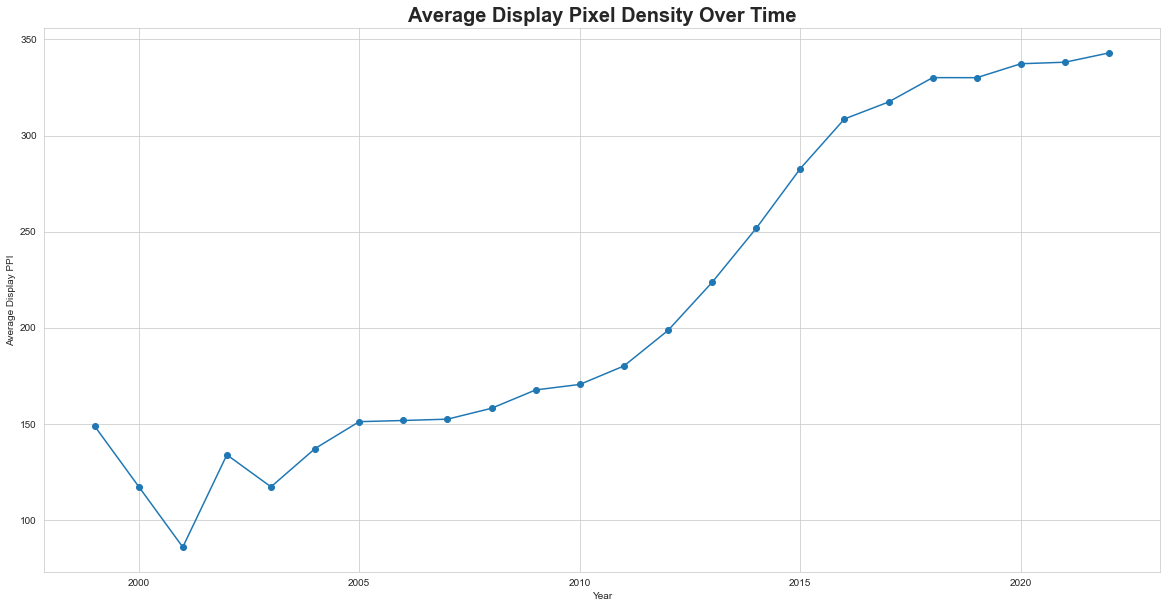

In [74]:
# Exclude rows with "Not Measured" display PPI
measured_pixel_density = top_brand_data[top_brand_data['Pixel_Density'] != 'Not Measured']

# Convert display brightness to numeric values
measured_pixel_density['Pixel_Density'] = pd.to_numeric(measured_pixel_density['Pixel_Density'])

# Exclude the year 2023
measured_pixel_density = measured_pixel_density[measured_pixel_density['Release_Year'] <= 2022]

# Group the data by year and calculate the average display brightness
avg_brightness_by_year = measured_pixel_density.groupby('Release_Year')['Pixel_Density'].mean()

# Plotting the line graph
plt.figure(figsize=(20, 10))
plt.plot(avg_brightness_by_year.index, avg_brightness_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Display PPI')
plt.title('Average Display Pixel Density Over Time', fontsize=20, weight='bold')
plt.grid(True)
plt.show()

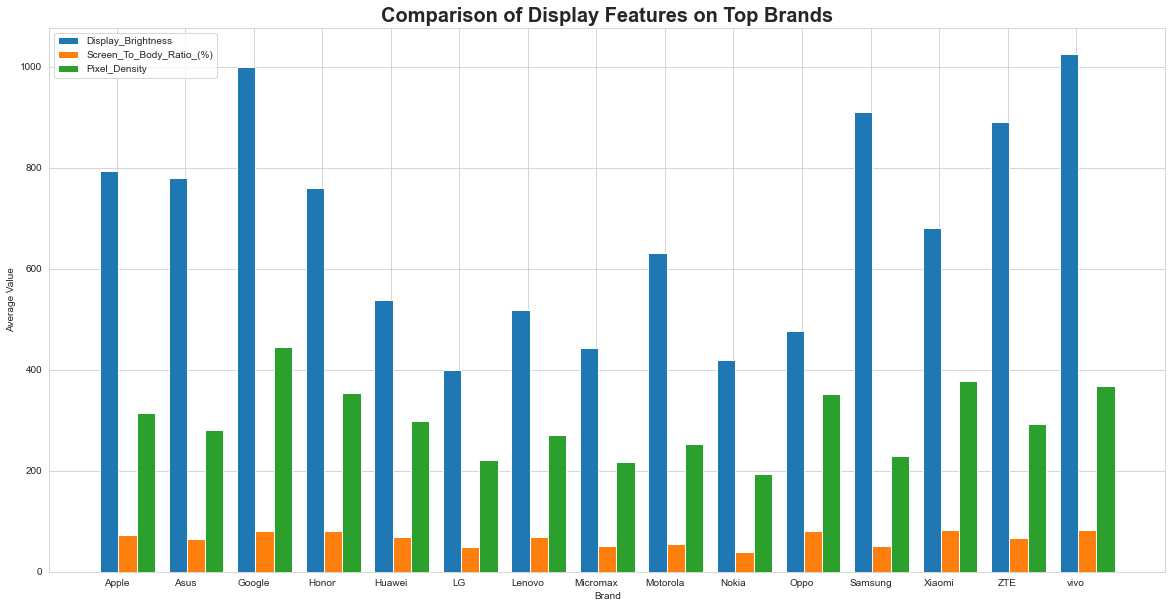

In [75]:
# Count the number of devices for each brand
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()

# Select the top 20 brands with the most number of devices
top_brands = brand_counts.head(20)

# add Apple and Google to the list of top brands
top_brands = top_brands.append(pd.Series({'Apple': 0, 'Google': 0}))

# Filter the data for the top brands
top_brand_data = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Brand'].isin(top_brands.index)]



# Define the columns to compare
columns_to_compare = ['Display_Brightness', 'Screen_To_Body_Ratio_(%)', 'Pixel_Density']

# Filter out non-numeric and "Not Specified" or "Not Measured" values
numeric_data = top_brand_data.replace(['Not Specified', 'Not Measured'], float('NaN'))
numeric_data[columns_to_compare] = numeric_data[columns_to_compare].apply(pd.to_numeric, errors='coerce')

# Set the figure size
plt.figure(figsize=(20, 10))

# Get the number of columns to compare
num_columns = len(columns_to_compare)

# Set the width of each bar
bar_width = 0.8 / num_columns

# Filter brands that have non-null values for Display_Brightness
valid_brands = numeric_data.dropna(subset=['Display_Brightness'])['Brand'].unique()

# Loop through the columns and plot the bar chart for each
for i, column in enumerate(columns_to_compare):
    # Get the average values for each brand, excluding NaN values
    avg_values = numeric_data[numeric_data['Brand'].isin(valid_brands)].groupby('Brand')[column].mean().dropna()
    
    # Calculate the x positions for the bars
    x_pos = np.arange(len(avg_values)) + (i * bar_width) - (0.4 * bar_width)
    
    # Plot the bars
    plt.bar(x_pos, avg_values, width=bar_width, label=column)
    
# Set the x-axis ticks and labels
plt.xticks(np.arange(len(avg_values)), avg_values.index)
plt.xlabel('Brand')
plt.ylabel('Average Value')
plt.title('Comparison of Display Features on Top Brands', fontsize=20, weight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()


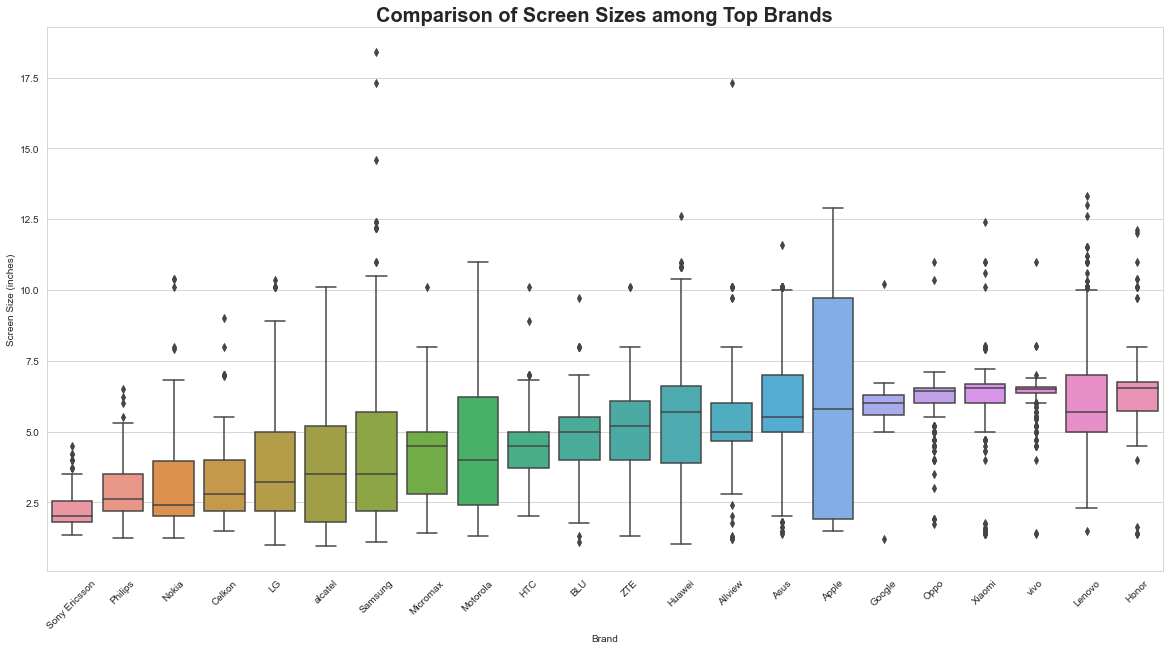

In [76]:
# Filter out non-numeric and "Not Specified" or "Not Measured" values
numeric_data = top_brand_data.replace(['Not Specified', 'Not Measured'], float('NaN'))
numeric_data['Display_Size_(inches)'] = numeric_data['Display_Size_(inches)'].apply(pd.to_numeric, errors='coerce')

# Set the figure size
plt.figure(figsize=(20, 10))

# Define the order of brands based on their average screen size
brand_order = numeric_data.groupby('Brand')['Display_Size_(inches)'].mean().dropna().sort_values().index

# Create the boxplot
sns.boxplot(x='Brand', y='Display_Size_(inches)', data=numeric_data, order=brand_order)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Brand')
plt.ylabel('Screen Size (inches)')
plt.title('Comparison of Screen Sizes among Top Brands', fontsize=20, weight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [77]:
cleaned_gsm_arena_data['Display_HDR_Capability'].value_counts()

No HDR    11319
HDR10+      334
HDR10       230
HDR          53
Name: Display_HDR_Capability, dtype: int64

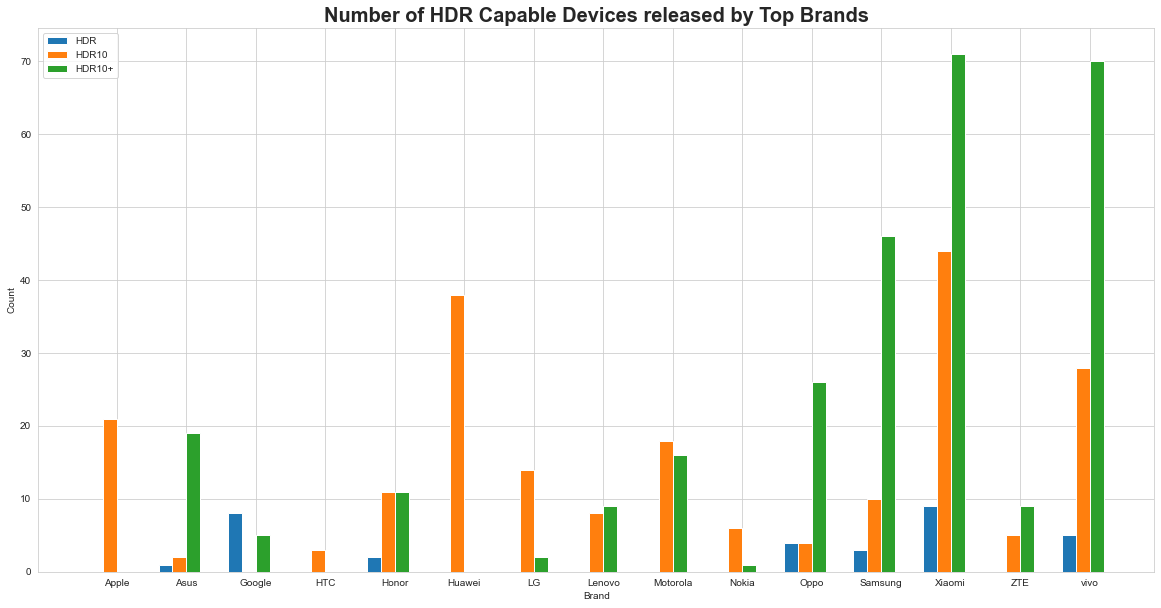

In [78]:
# Exclude "No HDR" values
cam_hdr_data = top_brand_data[top_brand_data['Display_HDR_Capability'] != 'No HDR']

# Get the counts of each HDR type for each brand
cam_hdr_counts = cam_hdr_data.pivot_table(index='Brand', columns='Display_HDR_Capability', aggfunc='size', fill_value=0)

# Get the HDR types
hdr_types = cam_hdr_counts.columns.tolist()

# Set the figure size
plt.figure(figsize=(20, 10))

# Set the width of each bar
bar_width = 0.2

# Calculate the x positions for the bars
x_pos = np.arange(len(cam_hdr_counts.index))

# Loop through the HDR types and plot the bar graphs side by side for each brand
for i, hdr_type in enumerate(hdr_types):
    # Get the counts for the current HDR type
    counts = cam_hdr_counts[hdr_type]
    
    # Calculate the offset for the current HDR type
    offset = (i - 1.5) * bar_width
    
    # Plot the bar graph for the current HDR type
    plt.bar(x_pos + offset, counts.values, width=bar_width, label=hdr_type)

# Set the x-axis ticks and labels
plt.xticks(x_pos, cam_hdr_counts.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of HDR Capable Devices released by Top Brands', fontsize=20, weight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [79]:
import matplotlib.pyplot as plt

# Exclude devices with "no special protection"
protected_data = top_brand_data[top_brand_data['Display_Protection'] != 'no special protection']

# Extract the year from the Release_Year column
protected_data['Year'] = protected_data['Release_Year'].apply(lambda x: int(str(x)[:4]))

# Group by year and calculate the percentage of protected devices
yearly_protection_percentage = protected_data.groupby('Year')['Display_Protection'].count() / top_brand_data.groupby('Release_Year')['Brand'].count() * 100

# Exclude 2022 data
yearly_protection_percentage = yearly_protection_percentage[yearly_protection_percentage.index < 2022]

# Plot the line graph
plt.figure(figsize=(20, 10))
plt.plot(yearly_protection_percentage.index, yearly_protection_percentage.values, marker='o')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Percentage of Devices with Protection')

# Set the title
plt.title('Percentage of Devices with some Display Protection Over Time', fontsize=20, weight='bold')

# Show the plot
plt.show()


KeyError: 'Release_Year'

In [ ]:
# Group the data by year and display type and calculate the count
os_counts = top_brand_data.groupby(['Release_Year', 'Display_Type'])['Brand'].count().unstack()

# Exclude the "Not Specified" display type
os_counts = os_counts.drop('Not Specified', axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create the stacked area plot
os_counts.plot(kind='area', stacked=True, cmap='tab20', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Devices')

# Set the title
ax.set_title('Evolution of Display Types Over Time', fontsize=20, weight='bold')

# Move the legend outside the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


***** Cameras *****

In [ ]:
cleaned_gsm_arena_data.columns

In [ ]:
top_brand_data['Number_of_Rear_Cameras'].value_counts()

In [ ]:
# Group the data by year and calculate the average number of rear cameras
average_cameras_per_year = top_brand_data.groupby('Release_Year')['Number_of_Rear_Cameras'].mean()

# Create a line plot
plt.figure(figsize=(20, 10))
plt.plot(average_cameras_per_year.index, average_cameras_per_year.values)

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Average Number of Rear Cameras')

# Set the title
plt.title('Average Number of Rear Cameras per Year', fontsize=20, weight='bold')

# Show the plot
plt.show()


In [ ]:
# Create a boxplot for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=top_brand_data, x='Release_Year', y='Number_of_Rear_Cameras')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Number of Rear Cameras')

# Set the title
plt.title('Distribution of Rear Cameras by Year', fontsize=20, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
import seaborn as sns

# Convert "VGA" to 0.3 and "no camera" to 0
top_brand_data['Highest_Camera_Resolution'] = top_brand_data['Highest_Camera_Resolution'].replace({'VGA': 0.3, 'no camera': 0})

# Convert the column to numeric type
top_brand_data['Highest_Camera_Resolution'] = pd.to_numeric(top_brand_data['Highest_Camera_Resolution'])

# Calculate the average camera resolution per year
average_resolution_per_year = top_brand_data.groupby('Release_Year')['Highest_Camera_Resolution'].mean()

# Create a line plot of average camera resolution per year
plt.figure(figsize=(20, 10))
plt.plot(average_resolution_per_year.index, average_resolution_per_year.values, marker='o')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Average Camera Resolution')

# Set the title
plt.title('Average Rear Camera Resolution per Year in Megapixels', fontsize=20, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Create boxplots of camera resolutions per year
plt.figure(figsize=(20, 10))
sns.boxplot(data=top_brand_data, x='Release_Year', y='Highest_Camera_Resolution')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Camera Resolution')

# Set the title
plt.title('Rear Camera Resolution per Year in Megapixels', fontsize=20, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# filter out data after 2022
cam_hdr_data = top_brand_data[top_brand_data['Release_Year'] <= 2022]

# Group the data by year and calculate the percentage of HDR capable devices
cam_hdr_percentage = cam_hdr_data.groupby('Release_Year')['HDR'].apply(lambda x: (x != 'no HDR').sum() / len(x) * 100)

# Set the figure size
plt.figure(figsize=(20, 10))

# Set the width of each bar
bar_width = 0.2

# Calculate the x positions for the bars
x_pos = np.arange(len(cam_hdr_percentage.index))

# Plot the bar graph for HDR percentages
plt.bar(x_pos, cam_hdr_percentage.values, width=bar_width)

# Set the x-axis ticks and labels
plt.xticks(x_pos, cam_hdr_percentage.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Percentage of HDR Capable Devices')
plt.title('Percentage of HDR Capable Devices Released Each Year', fontsize=20, weight='bold')

# Show the plot
plt.show()


In [ ]:
# Create a boxplot for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=top_brand_data, x='Release_Year', y='Number_of_Selfie_Cameras')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Number of Selfie Cameras')

# Set the title
plt.title('Distribution of Selfie Cameras by Year', fontsize=20, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


***** OS + Chipset *****

In [ ]:
# Group the data by year and display type and calculate the count
os_data = top_brand_data[top_brand_data['Release_Year'] <= 2022]
os_counts = os_data.groupby(['Release_Year', 'Mobile_OS'])['Mobile_OS'].count().unstack()

# Exclude the "Not Specified" display type
os_counts = os_counts.drop('unspecified', axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create the stacked area plot
os_counts.plot(kind='area', stacked=True, cmap='Set1', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Devices')

# Set the title
ax.set_title('Evolution of Mobile OSs Over Time', fontsize=20, weight='bold')

# Move the legend outside the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


In [ ]:
# Create a pivot table to count the number of models released for each Mobile OS in each year
chipset_per_year = pd.pivot_table(top_brand_data, values='Model', index='Mobile_OS', columns='Release_Year', aggfunc='count', fill_value=0)

# Reindex the pivot table to include all years from 1995 to 2022
all_years = pd.Index(range(1994, 2023), name='Year')
chipset_per_year = chipset_per_year.reindex(columns=all_years, fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
chipset_per_year = chipset_per_year.reset_index()

# Create a new dataframe to record the changes
changes_df = chipset_per_year.copy()

# Iterate over each row starting from the second row
for i in range(0, len(chipset_per_year)):
    # Iterate over each year column starting from the second column
    for j in range(2, len(chipset_per_year.columns)):
        if j == 0:
            continue

        prev_value = int(chipset_per_year.iloc[i, j-1])
        curr_value = int(chipset_per_year.iloc[i, j])

        # Check the conditions and label the changes accordingly
        if prev_value == 0 and curr_value > 0:
            changes_df.iloc[i, j] = "entered"
        elif prev_value == 0 and curr_value == 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value > 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value == 0:
            changes_df.iloc[i, j] = "exited"

# Compute the counts of entered and exited Mobile OSs
entered_counts = changes_df[changes_df == "entered"].count()
exited_counts = changes_df[changes_df == "exited"].count()

# Create a bar plot
fig, ax = plt.subplots(figsize=(20, 10))
exited_counts.plot(kind="bar", color="red", label="Exited", ax=ax)
entered_counts.plot(kind="bar", color="green", label="Entered", ax=ax, width=0.3)

# Set the plot title and axis labels
plt.title("Mobile OS Turnover", fontsize=20, weight='bold')
plt.xlabel("Year")
plt.ylabel("Count")

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
cleaned_gsm_arena_data['Mobile_OS_Version'].value_counts()

In [ ]:
# Group the data by year and display type and calculate the count
chipset_data = top_brand_data[top_brand_data['Release_Year'] <= 2022]
chipset_counts = chipset_data.groupby(['Release_Year', 'Chipset_Maker'])['Chipset_Maker'].count().unstack()

# Exclude the "Not Specified" display type
chipset_counts = chipset_counts.drop('unspecified', axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create the stacked area plot
chipset_counts.plot(kind='area', stacked=True, cmap='Set1', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Devices')

# Set the title
ax.set_title('Evolution of Mobile Chipset Makers Over Time', fontsize=20, weight='bold')

# Move the legend outside the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [ ]:
# Create a pivot table to count the number of models released for each Mobile OS in each year
chipset_per_year = pd.pivot_table(top_brand_data, values='Model', index='Chipset_Maker', columns='Release_Year', aggfunc='count', fill_value=0)

# Reindex the pivot table to include all years from 1995 to 2022
all_years = pd.Index(range(1994, 2023), name='Year')
chipset_per_year = chipset_per_year.reindex(columns=all_years, fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
chipset_per_year = chipset_per_year.reset_index()

# Create a new dataframe to record the changes
changes_df = chipset_per_year.copy()

# Iterate over each row starting from the second row
for i in range(0, len(chipset_per_year)):
    # Iterate over each year column starting from the second column
    for j in range(2, len(chipset_per_year.columns)):
        if j == 0:
            continue

        prev_value = int(chipset_per_year.iloc[i, j-1])
        curr_value = int(chipset_per_year.iloc[i, j])

        # Check the conditions and label the changes accordingly
        if prev_value == 0 and curr_value > 0:
            changes_df.iloc[i, j] = "entered"
        elif prev_value == 0 and curr_value == 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value > 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value == 0:
            changes_df.iloc[i, j] = "exited"

# Compute the counts of entered and exited Mobile OSs
entered_counts = changes_df[changes_df == "entered"].count()
exited_counts = changes_df[changes_df == "exited"].count()

# Create a bar plot
fig, ax = plt.subplots(figsize=(20, 10))
exited_counts.plot(kind="bar", color="red", label="Exited", ax=ax)
entered_counts.plot(kind="bar", color="green", label="Entered", ax=ax, width=0.3)

# Set the plot title and axis labels
plt.title("Chipset Maker Turnover over Time", fontsize=20, weight='bold')
plt.xlabel("Year")
plt.ylabel("Count")

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
# Filter the DataFrame to exclude 0 values and data for the year 2023
filtered_df5 = top_brand_data[(top_brand_data['Fabrication_Process'] != 0) & (top_brand_data['Release_Year'] <= 2022)]

# Calculate the average Fabrication Process per year
avg_battery_capacity = filtered_df5.groupby('Release_Year')['Fabrication_Process'].mean()

# Create the line plot
plt.figure(figsize=(20, 10))
plt.plot(avg_battery_capacity.index, avg_battery_capacity.values, marker='o')

# Set the x-axis ticks and labels
plt.xticks(avg_battery_capacity.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Average Fabrication Process')
plt.title('Average Fabrication Process per Year in nm', fontsize=20, weight='bold')

# Show the plot
plt.show()


In [ ]:
# Filter the DataFrame to exclude 0 values and data for the year 2023
filtered_df5 = top_brand_data[(top_brand_data['Number_of_CPU_Cores'] != 'Unspecified') & (top_brand_data['Release_Year'] <= 2022)]

# Calculate the average Fabrication Process per year
avg_battery_capacity = filtered_df5.groupby('Release_Year')['Number_of_CPU_Cores'].mean()

# Create the line plot
plt.figure(figsize=(20, 10))
plt.plot(avg_battery_capacity.index, avg_battery_capacity.values, marker='o')

# Set the x-axis ticks and labels
plt.xticks(avg_battery_capacity.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Average Number of CPU Cores')
plt.title('Average Number of CPU Cores per Year', fontsize=20, weight='bold')

# Show the plot
plt.show()

In [ ]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = top_brand_data[(top_brand_data['CPU_Performance_Core_Frequency'] != 'unspecified') & 
                  (top_brand_data['Release_Year'] <= 2022) & 
                  (pd.to_numeric(top_brand_data['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['CPU_Performance_Core_Frequency'] = pd.to_numeric(filtered_df['CPU_Performance_Core_Frequency'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='CPU_Performance_Core_Frequency')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('CPU Performance Core Frequency in GHz')
plt.title('Distribution of CPU Performance Core Frequency by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = top_brand_data[(top_brand_data['CPU_Efficiency_Core_Frequency'] != 'unspecified') & 
                  (top_brand_data['CPU_Performance_Core_Frequency'] != 'unspecified') & 
                  (top_brand_data['Release_Year'] <= 2022) & 
                  (pd.to_numeric(top_brand_data['CPU_Efficiency_Core_Frequency'], errors='coerce') <= 10) & 
                  (pd.to_numeric(top_brand_data['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Efficiency_Core_Frequency and CPU_Performance_Core_Frequency columns to numeric
filtered_df['CPU_Efficiency_Core_Frequency'] = pd.to_numeric(filtered_df['CPU_Efficiency_Core_Frequency'], errors='coerce')
filtered_df['CPU_Performance_Core_Frequency'] = pd.to_numeric(filtered_df['CPU_Performance_Core_Frequency'], errors='coerce')

# Calculate the average values per year
average_efficiency_freq = filtered_df.groupby('Release_Year')['CPU_Efficiency_Core_Frequency'].mean()
average_performance_freq = filtered_df.groupby('Release_Year')['CPU_Performance_Core_Frequency'].mean()

# Plot the average CPU efficiency core frequency
plt.figure(figsize=(20, 10))
sns.lineplot(data=average_efficiency_freq, marker='o', label='CPU Efficiency Core Frequency')

# Plot the average CPU performance core frequency
sns.lineplot(data=average_performance_freq, marker='o', label='CPU Performance Core Frequency')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Frequency (GHz)')
plt.title('Average CPU Efficiency and Performance Core Frequency per Year', fontsize=20, weight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = top_brand_data[(top_brand_data['ROM'] != 'unspecified') & 
                  (top_brand_data['Release_Year'] <= 2022)]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['ROM'] = pd.to_numeric(filtered_df['ROM'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='ROM')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('ROM in GB')
plt.title('Distribution of ROM Capacity by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = top_brand_data[(top_brand_data['RAM'] != 'unspecified') & 
                  (top_brand_data['Release_Year'] <= 2022)]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['RAM'] = pd.to_numeric(filtered_df['RAM'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='RAM')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('RAM in GB')
plt.title('Distribution of RAM Capacity by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Group the data by year and display type and calculate the count
chipset_data = top_brand_data[top_brand_data['Release_Year'] <= 2022]
chipset_counts = chipset_data.groupby(['Release_Year', 'SD Card Slot'])['SD Card Slot'].count().unstack()

# Exclude the "Not Specified" display type
#chipset_counts = chipset_counts.drop('unspecified', axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create the stacked area plot
chipset_counts.plot(kind='area', stacked=True, cmap='Set1', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Devices')

# Set the title
ax.set_title('Evolution of Memory Expansion Slot Over Time', fontsize=20, weight='bold')

# Move the legend outside the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

***** Battery *****

In [ ]:
top_brand_data['Removable'].value_counts()

In [ ]:
# Exclude the year 2023
filtered_df = top_brand_data[top_brand_data['Release_Year'] != 2023]

# Filter the dataframe for Li-Ion and Li-Po battery types
yes_counts = filtered_df[filtered_df['Battery_Type'] == 'Li-Ion']['Release_Year'].value_counts().sort_index()
no_counts = filtered_df[filtered_df['Battery_Type'] == 'Li-Po']['Release_Year'].value_counts().sort_index()

# Plot the count of Li-Ion battery devices released in each year
plt.figure(figsize=(20, 10))
yes_counts.plot(marker='o', label='Li-Ion')

# Plot the count of Li-Po battery devices released in each year
no_counts.plot(marker='o', label='Li-Po')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Li-Ion and Li-Po Battery Devices Released per Year', fontsize=20, weight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Exclude the year 2023
filtered_df = top_brand_data[top_brand_data['Release_Year'] != 2023]

# Filter the dataframe for Li-Ion and Li-Po battery types
yes_counts = filtered_df[filtered_df['Removable'] == 'Yes']['Release_Year'].value_counts().sort_index()
no_counts = filtered_df[filtered_df['Removable'] == 'No']['Release_Year'].value_counts().sort_index()

# Plot the count of Li-Ion battery devices released in each year
plt.figure(figsize=(20, 10))
yes_counts.plot(marker='o', label='Removable')

# Plot the count of Li-Po battery devices released in each year
no_counts.plot(marker='o', label='Non-Removable')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Removable and Non-Removable Battery Devices Released per Year', fontsize=20, weight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
top_brand_data['Battery_Capacity'].value_counts()

In [ ]:
# Filter the DataFrame to exclude 0 values and data for the year 2023
filtered_df5 = top_brand_data[(top_brand_data['Battery_Capacity'] != 'unspecified') & (top_brand_data['Release_Year'] <= 2022)]

# Calculate the average Fabrication Process per year
avg_battery_capacity = filtered_df5.groupby('Release_Year')['Battery_Capacity'].mean()

# Create the line plot
plt.figure(figsize=(20, 10))
plt.plot(avg_battery_capacity.index, avg_battery_capacity.values, marker='o')

# Set the x-axis ticks and labels
plt.xticks(avg_battery_capacity.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Average Battery Capacity in mAh')
plt.title('Average Battery Capacity per Year', fontsize=20, weight='bold')

# Show the plot
plt.show()

In [ ]:
top_brand_data['Reverse_Charging'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

# Replace "unspecified" values with "No" in both columns
top_brand_data['Wireless_Charging'] = top_brand_data['Wireless_Charging'].replace('unspecified', 'No')
top_brand_data['Reverse_Charging'] = top_brand_data['Reverse_Charging'].replace('unspecified', 'No')

# Exclude the year 2023
filtered_df = top_brand_data[top_brand_data['Release_Year'] != 2023]

# Calculate the percentage of mobile devices with wireless charging in each year
wireless_charging_percentages = (filtered_df[filtered_df['Wireless_Charging'] == 'Yes']['Release_Year']
                                 .value_counts(normalize=True).sort_index() * 100)

# Calculate the percentage of mobile devices with reverse charging in each year
reverse_charging_percentages = (filtered_df[filtered_df['Reverse_Charging'] == 'Yes']['Release_Year']
                                .value_counts(normalize=True).sort_index() * 100)

# Plot the line graph for wireless charging percentages
plt.figure(figsize=(20, 10))
wireless_charging_percentages.plot(marker='o', label='Wireless Charging')

# Plot the line graph for reverse charging percentages
reverse_charging_percentages.plot(marker='o', label='Reverse Charging')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Mobile Devices with Wireless Charging and Reverse Charging per Year', fontsize=20, weight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
'Charging_Speed','Battery_Life'

In [ ]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = top_brand_data[(top_brand_data['Battery_Life'] != 'untested') & 
                  (top_brand_data['Release_Year'] <= 2022)]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['Battery_Life'] = pd.to_numeric(filtered_df['Battery_Life'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='Battery_Life')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Battery Life in Hours')
plt.title('Distribution of Battery Life by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = top_brand_data[(top_brand_data['Charging_Speed'] != 'unspecified') & 
                  (top_brand_data['Release_Year'] <= 2022)]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['Charging_Speed'] = pd.to_numeric(filtered_df['Charging_Speed'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='Charging_Speed')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Charging Speed in Watts')
plt.title('Distribution Charging Speed by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Define the columns to compare
columns_to_compare = ['Battery_Life', 'Charging_Speed']

# Filter out non-numeric and "Not Specified" or "Not Measured" values
numeric_data = top_brand_data.replace(['unspecified', 'untested'], float('NaN'))
numeric_data[columns_to_compare] = numeric_data[columns_to_compare].apply(pd.to_numeric, errors='coerce')

# Set the figure size
plt.figure(figsize=(20, 10))

# Get the number of columns to compare
num_columns = len(columns_to_compare)

# Set the width of each bar
bar_width = 0.8 / num_columns

# Filter brands that have non-null values for Display_Brightness
#valid_brands = numeric_data.dropna(subset=['Display_Brightness'])['Brand'].unique()

# Loop through the columns and plot the bar chart for each
for i, column in enumerate(columns_to_compare):
    # Get the average values for each brand, excluding NaN values
    avg_values = numeric_data[numeric_data['Brand'].isin(valid_brands)].groupby('Brand')[column].mean().dropna()
    
    # Calculate the x positions for the bars
    x_pos = np.arange(len(avg_values)) + (i * bar_width) - (0.4 * bar_width)
    
    # Plot the bars
    plt.bar(x_pos, avg_values, width=bar_width, label=column)
    
# Set the x-axis ticks and labels
plt.xticks(np.arange(len(avg_values)), avg_values.index)
plt.xlabel('Brand')
plt.ylabel('Average Value')
plt.title('Comparison of Battery Features on Top Brands', fontsize=20, weight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Exclude "unspecified" and "untested" values from the columns
filtered_df = top_brand_data[(top_brand_data['Battery_Life'] != 'unspecified') &
                  (top_brand_data['Battery_Life'] != 'untested') &
                  (top_brand_data['Battery_Capacity'] != 'unspecified') &
                  (top_brand_data['Battery_Capacity'] != 'untested')]

# Convert columns to numeric data types
filtered_df['Battery_Life'] = pd.to_numeric(filtered_df['Battery_Life'])
filtered_df['Battery_Capacity'] = pd.to_numeric(filtered_df['Battery_Capacity'])

# Create scatterplot using Seaborn
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_df, x='Battery_Capacity', y='Battery_Life')

# Set plot title and axis labels
plt.title('Battery Capacity vs. Battery Life', fontsize=20, weight='bold')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Battery Life (hours)')

# Display the scatterplot
plt.show()


In [ ]:
# Exclude "unspecified" and "untested" values from the columns
filtered_df = top_brand_data[(top_brand_data['Battery_Life'] != 'unspecified') &
                  (top_brand_data['Battery_Life'] != 'untested') &
                  (top_brand_data['Charging_Speed'] != 'unspecified') &
                  (top_brand_data['Charging_Speed'] != 'untested')]

# Convert columns to numeric data types
filtered_df['Battery_Life'] = pd.to_numeric(filtered_df['Battery_Life'])
filtered_df['Battery_Capacity'] = pd.to_numeric(filtered_df['Battery_Capacity'])
filtered_df['Charging_Speed'] = pd.to_numeric(filtered_df['Charging_Speed'])

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create scatterplot for Battery_Capacity and Charging_Speed
plt.subplot(1, 2, 1)
sns.scatterplot(data=filtered_df, x='Battery_Capacity', y='Charging_Speed')
plt.title('Battery Capacity vs. Charging Speed', fontsize=20, weight='bold')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Charging Speed')

# Create scatterplot for Battery_Life and Charging_Speed
plt.subplot(1, 2, 2)
sns.scatterplot(data=filtered_df, x='Battery_Life', y='Charging_Speed')
plt.title('Battery Life vs. Charging Speed', fontsize=20, weight='bold')
plt.xlabel('Battery Life (hours)')
plt.ylabel('Charging Speed')

# Adjust spacing between subplots
plt.tight_layout()

# Display the scatterplots
plt.show()


***** Special Features *****

In [ ]:
cleaned_gsm_arena_data.columns

In [ ]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = top_brand_data[top_brand_data['Release_Year'] <= 2022]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['Colors'] = pd.to_numeric(filtered_df['Colors'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='Colors')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Number of Color Options')
plt.title('Distribution of Color Options by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Exclude the "unspecified" values and year 2023 for Radio
radio_filtered = top_brand_data[(top_brand_data['Radio'] != 'unspecified') & (top_brand_data['Release_Year'] != 2023)]
radio_filtered['Radio'] = radio_filtered['Radio'].replace('Yes (Market/Model/Software Dependent)', 'Yes')
radio_percentage = radio_filtered.groupby('Release_Year')['Radio'].apply(lambda x: (x == 'Yes').mean() * 100)

# Exclude the "unspecified" values and year 2023 for NFC
nfc_filtered = top_brand_data[(top_brand_data['NFC'] != 'unspecified') & (top_brand_data['Release_Year'] != 2023)]
nfc_filtered['NFC'] = nfc_filtered['NFC'].replace('Yes (Market/Model/Use Case Dependent)', 'Yes')
nfc_percentage = nfc_filtered.groupby('Release_Year')['NFC'].apply(lambda x: (x == 'Yes').mean() * 100)

# Exclude the "unspecified" values and year 2023 for Headphone Jack
headphone_jack_filtered = top_brand_data[(top_brand_data['Headphone_Jack'] != 'unspecified') & (top_brand_data['Release_Year'] != 2023)]
headphone_jack_percentage = headphone_jack_filtered.groupby('Release_Year')['Headphone_Jack'].apply(lambda x: (x == 'Yes').mean() * 100)

# Change "No Resistance" values to "No" and all other values to "Yes" for IP Rating
ip_rating_unique = top_brand_data['IP_Rating'].unique()
replace_dict = {'No Resistance': 'No'}
for rating in ip_rating_unique[1:]:
    replace_dict[rating] = 'Yes'
top_brand_data['IP_Rating'] = top_brand_data['IP_Rating'].replace(replace_dict)

# Filter the data up to 2022 for IP Rating
ip_rating_filtered = top_brand_data[top_brand_data['Release_Year'] <= 2022]
ip_rating_percentage = ip_rating_filtered.groupby('Release_Year')['IP_Rating'].apply(lambda x: (x == 'Yes').mean() * 100)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the four line graphs with markers
sns.lineplot(data=radio_percentage, ax=ax, marker='o', label='Radio')
sns.lineplot(data=nfc_percentage, ax=ax, marker='o', label='NFC')
sns.lineplot(data=headphone_jack_percentage, ax=ax, marker='o', label='Headphone Jack')
sns.lineplot(data=ip_rating_percentage, ax=ax, marker='o', label='IP Rating')

# Annotate the lines with their respective titles
for line in ax.lines:
    x = line.get_xdata()[-1]
    y = line.get_ydata()[-1]
    label = line.get_label()
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(-5, 10), ha='center')

# Set the title, x-axis label, y-axis label, and y-axis limits
ax.set_title('Evolution of Special Features', fontsize=20, weight='bold')
ax.set_xlabel('Release Year')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100)

# Remove the legend
ax.legend_.remove()

# Show the plot
plt.show()


***** Price *****

In [ ]:
top_brand_data['Price'].value_counts()

In [ ]:
# Filter out unspecified and non-numeric values in the Price column
filtered_data = top_brand_data[(top_brand_data['Price'] != 'unspecified') & (top_brand_data['Release_Year'] != 2023)]
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'])

# Group the filtered data by Release_Year and calculate the average price
average_price = filtered_data.groupby('Release_Year')['Price'].mean()

# Create a line plot for the average price over the years
plt.figure(figsize=(20, 10))
plt.plot(average_price.index, average_price.values)
plt.title('Average Price of Devices Over the Years', fontsize=20, weight='bold')
plt.xlabel('Release Year')
plt.ylabel('Average Price')
plt.ylim(0)  # Set the y-axis lower limit to 0

# Show the plot
plt.show()


In [ ]:
# Filter out unspecified and non-numeric values in the Price column
filtered_data = top_brand_data[top_brand_data['Price'] != 'unspecified']
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'])

# Sort the data by Price in descending order and select the top 10 rows
top_10_expensive = filtered_data.nlargest(20, 'Price')

# Select the desired columns
result = top_10_expensive[['Price', 'Brand', 'Model', 'Release_Year']]

# Display the result as a table
print(result)


In [ ]:
# Filter out unspecified and non-numeric values in the Price column
filtered_data = top_brand_data[top_brand_data['Price'] != 'unspecified']
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'])

# Sort the data by Price in ascending order and select the top 10 rows
top_10_cheapest = filtered_data.nsmallest(100, 'Price')

# Select the desired columns
result = top_10_cheapest[['Price', 'Brand', 'Model', 'Release_Year']]

# Display the result as a table
print(result)


In [ ]:
# Filter out the "unspecified" values from the "Price" column
filtered_data = top_brand_data[top_brand_data['Price'] != 'unspecified']

# Convert the "Price" column to numeric
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'], errors='coerce')

# Filter out prices above 6000
filtered_data = filtered_data[filtered_data['Price'] <= 6000]

# Calculate the average price per brand
average_price = filtered_data.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a bar plot of average price per brand
sns.barplot(x=average_price.index, y=average_price.values, color='blue')

# Set the title and labels
plt.title('Average Price per Brand', fontsize=20, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
# Filter out the "unspecified" values from the "Price" column
filtered_data = top_brand_data[top_brand_data['Price'] != 'unspecified']

# Convert the "Price" column to numeric
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'], errors='coerce')

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a boxplot of Price distribution for each brand
sns.boxplot(x='Brand', y='Price', data=filtered_data)

# Set the title and labels
plt.title('Price Distribution by Brand', fontsize=20, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
# Filter out the "unspecified" values from the "Price" column
filtered_data = top_brand_data[top_brand_data['Price'] != 'unspecified']

# Convert the "Price" column to numeric
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'], errors='coerce')

# Filter out prices above 6000
filtered_data = filtered_data[filtered_data['Price'] <= 3000]

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a boxplot of Price distribution for each brand
sns.boxplot(x='Brand', y='Price', data=filtered_data)

# Set the title and labels
plt.title('Price Distribution by Brand', fontsize=20, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
# Replace "unspecified" values with NaN
top_brand_data['Price'] = top_brand_data['Price'].replace('unspecified', np.nan)

# Convert the 'Price' column to numeric data type
top_brand_data['Price'] = pd.to_numeric(top_brand_data['Price'])




# Select the relevant numerical columns and drop rows with missing values
numeric_columns = ['Length', 'Width', 'Thickness', 'Weight', 'Display_Brightness', 'Display_Size_(inches)', 'Screen_To_Body_Ratio_(%)', 'Pixel_Density', 'CPU_Performance_Core_Frequency', 'CPU_Efficiency_Core_Frequency', 'ROM', 'RAM', 'Rear_Video_Resolution', 'Rear_Video_Framerate', 'Number_of_Selfie_Cameras', 'Selfie_Video_Resolution', 'Selfie_Video_Framerate', 'Battery_Capacity', 'Price']
numeric_df = top_brand_data[numeric_columns].dropna()

# Calculate the correlation coefficients
correlation_coeffs = top_brand_data[numeric_columns].corr()['Price'].abs().sort_values(ascending=False)

# Display the top influential columns
top_influential_columns = correlation_coeffs[1:40]  # Exclude 'Price' column

# Replace specified values with NaN
specified_values = ['Unspecified', 'unspecified', 'untested', 'not measured', 'Not measured']
top_brand_data = top_brand_data.replace(specified_values)

# Convert numeric columns to numeric data type
numeric_columns = top_brand_data.select_dtypes(include=np.number).columns
top_brand_data[numeric_columns] = top_brand_data[numeric_columns].apply(pd.to_numeric)

# Add 'Price' column back to the numeric columns
numeric_columns = numeric_columns.union(['Price'])

# Calculate the correlation coefficients
correlation_coeffs = top_brand_data[numeric_columns].corr()['Price'].abs().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(20, 10))
correlation_coeffs.drop('Price').plot(kind='bar')
plt.title('Top Influential Numerical Columns for Price', fontsize=20, weight='bold')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient (absolute value)')
plt.xticks(rotation=85)
plt.show()


In [ ]:
non_numeric_columns = top_brand_data.select_dtypes(exclude=np.number).columns
df_encoded = pd.get_dummies(top_brand_data[non_numeric_columns], drop_first=True)

# Combine numeric and encoded columns
df_combined = pd.concat([top_brand_data[numeric_columns], df_encoded], axis=1)
target_column = 'Price'
non_target_columns = df_combined.columns.drop(target_column)

correlation_coeffs = df_combined[non_target_columns].corrwith(df_combined[target_column])

# Sort the correlation coefficients in descending order
sorted_coeffs = correlation_coeffs.abs().sort_values(ascending=False)

# Select the top N columns with the highest correlations
top_columns = sorted_coeffs.head(50)

# Create a colormap with varying intensities
colormap = plt.cm.get_cmap('Blues')

# Plot the bar graph
plt.figure(figsize=(20, 10))
bars = plt.bar(top_columns.index, top_columns.values, color=colormap(sorted_coeffs.head(10) / sorted_coeffs.max()))

# Set the title and labels
plt.title('Top Correlated Columns with Price', fontsize=20, weight='bold')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient (absolute value)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add color legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Correlation Intensity')

# Show the plot
plt.show()


***** PCA *****

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Subset the dataset with relevant features
selected_features = ['Colors', 'Fabrication_Process', 'Highest_Camera_Resolution', 'Number_of_Rear_Cameras', 'Number_of_SIMs', 'Number_of_Selfie_Cameras', 'Battery_Life', 'Battery_Capacity', 'Charging_Speed', 'NFC', 'Display_HDR_Capability', 'Display_Type', 'Biometric_Sensor', 'ROM', 'RAM', 'Brand']
subset_df = top_brand_data[selected_features]

# Drop rows with specified string values
specified_values = ['unspecified', 'untested']
subset_df = subset_df[~subset_df.isin(specified_values)].dropna()

# Separate the features and the brand labels
features = subset_df.drop('Brand', axis=1)
brands = subset_df['Brand']

# Preprocess the categorical variables
categorical_features = ['Colors', 'Fabrication_Process', 'Highest_Camera_Resolution', 'Number_of_Rear_Cameras', 'Number_of_SIMs', 'Number_of_Selfie_Cameras', 'NFC', 'Display_HDR_Capability', 'Display_Type', 'Biometric_Sensor', 'ROM', 'RAM']
features = pd.get_dummies(features, columns=categorical_features)

# Standardize the numerical features
numerical_features = ['Battery_Life', 'Battery_Capacity', 'Charging_Speed']
scaler = StandardScaler()
features[numerical_features] = scaler.fit_transform(features[numerical_features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Get the feature contributions of the principal components
feature_contributions = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features.columns)

# Visualize the results with brand context
plt.figure(figsize=(30, 15))
for brand in set(brands):
    indices = brands == brand
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1])
    # Add brand names next to the data points
    for i in range(len(pca_result[indices, 0])):
        plt.text(pca_result[indices, 0][i], pca_result[indices, 1][i], brand, fontsize=8, ha='left', va='bottom')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis with Top Brand Context', fontsize=20, weight='bold')
plt.show()

# Print the feature contributions for the two principal components
print("Feature Contributions for Principal Component 1:")
print(feature_contributions['PC1'].nlargest(5))
print("\nFeature Contributions for Principal Component 2:")
print(feature_contributions['PC2'].nlargest(5))
